# MaixPy3 基本使用示例

| 时间 | 负责人 | 更新内容 | 备注 |
| --- | --- | --- | --- |
| 2022年1月18日 | dianjixz | 编写文档初稿 | 使用 jupyter notebook 编写，可以直接运行 |

假设你会 python ，并具有基础的视觉知识，下面是 maixpy3 的最简程序示例。


## "hello world!"

确保目标机器已经安装 maixpy3 软件包。

使用 maixpy3 包在图像上显示 "hello world!" 。


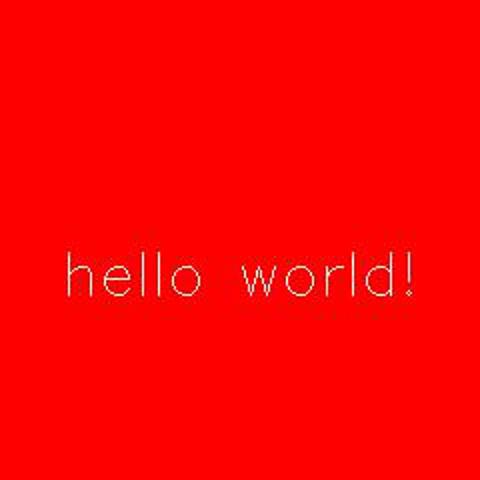

[ rpyc-kernel ]( running at Fri Jan 14 16:48:03 2022 )


In [1]:
from maix import display, image   #引入python模块包

hello_img = image.Image().new(size = (240, 240), 
                              color = (255, 0, 0), mode = "RGB")     #创建一张红色背景图

hello_img.draw_string(30, 115, "hello world!", scale = 1.0, 
                              color = (255, 255, 255), thickness = 1) #在红色背景图上写下hello world

display.show(hello_img)   #把这张图显示出来



## 从摄像头获取图像并显示

使用 maixpy3 包从摄像头获取图像并显示。

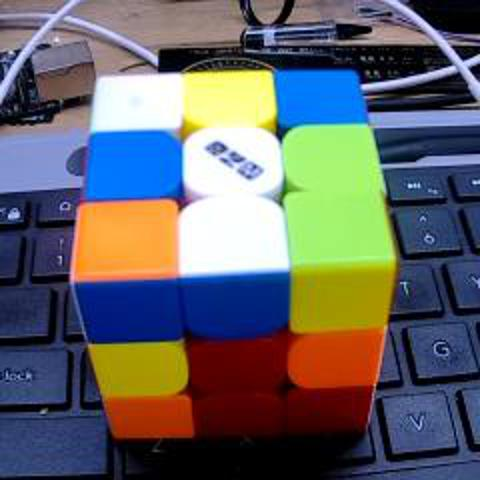


Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt


In [1]:
from maix import camera, display, image #引入python模块包

while True:
    img = camera.capture()    #从摄像头中获取一张图像
    display.show(img)         #将图像显示出来


## 图像的基础操作


### 图像的画线

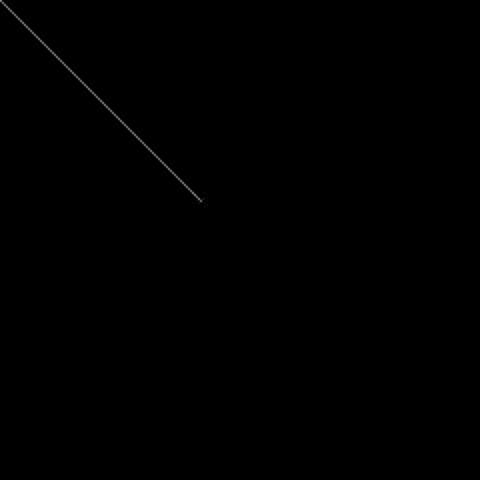

[ rpyc-kernel ]( running at Fri Jan 14 16:47:26 2022 )


In [1]:
from maix import image, display

img = image.Image().new(size = (240, 240), color = (0, 0, 0), 
                        mode = "RGB")     #创建一张黑色背景图

img.draw_line(0, 0, 100, 100, color = (127, 127, 127), 
                        thickness = 1)  #画一条从（0,0）到（100,100）的白色线段

display.show(img)

### 图像的画框

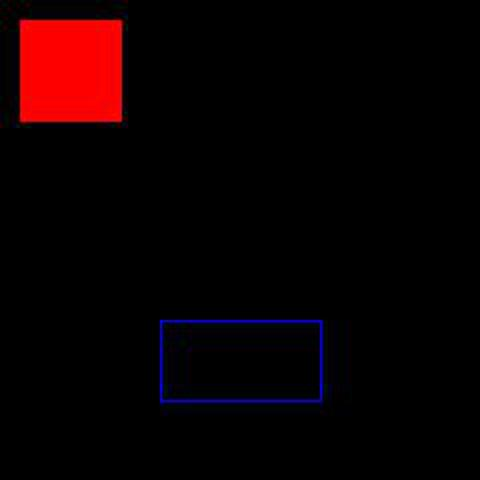

[ rpyc-kernel ]( running at Fri Jan 14 16:41:39 2022 )


In [1]:
from maix import image, display

img = image.Image().new(size = (240, 240), color = (0, 0, 0), 
                        mode = "RGB")     #创建一张黑色背景图

img.draw_rectangle(80, 160, 160, 200, color=(0, 0, 255), 
                       thickness=1)   #画一个从（80, 160）到（160, 200）的蓝色矩形外框

img.draw_rectangle(10, 10, 60, 60, color=(255, 0, 0), 
                       thickness=-1)   #画一个从（80, 160）到（160, 200）的红色实心矩形

display.show(img)

### 图像的画圆

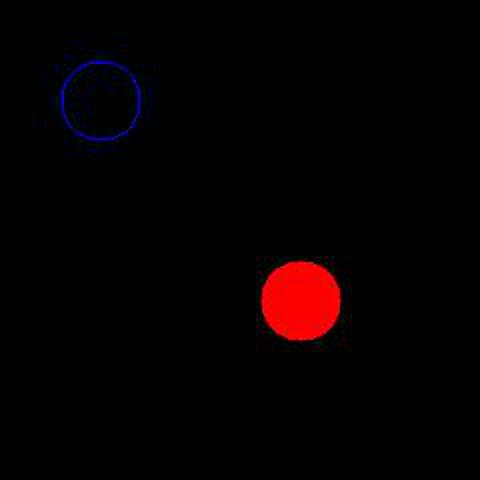

[ rpyc-kernel ]( running at Fri Jan 14 16:45:05 2022 )


In [1]:
from maix import image, display

img = image.Image().new(size = (240, 240), color = (0, 0, 0), 
                        mode = "RGB")     #创建一张黑色背景图

img.draw_circle(50, 50, 20, color=(0, 0, 255), 
                        thickness=1)   #画一个中心点在（50,50），半径为20的空心蓝圆

img.draw_circle(150, 150, 20, color=(255, 0, 0), 
                        thickness=-1)  #画一个中心点在（150,150），半径为20的实心红圆

display.show(img)

### 图像的画字符

注意：显示中文时需要加载字库！

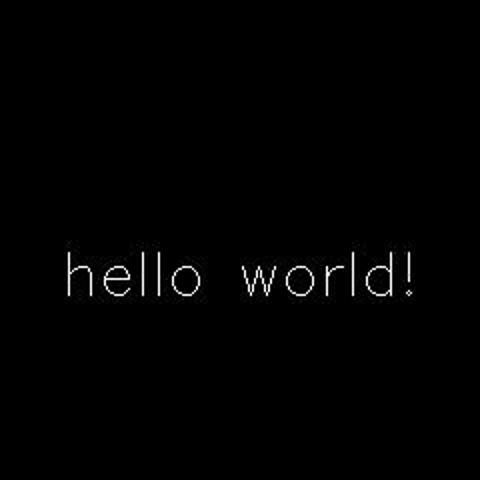

[ rpyc-kernel ]( running at Fri Jan 14 16:49:17 2022 )


In [1]:
from maix import display, image   #引入python模块包

hello_img = image.Image().new(size = (240, 240), color = (0, 0, 0), 
                              mode = "RGB")     #创建一张黑色背景图

hello_img.draw_string(30, 115, "hello world!", scale = 1.0, color = (255, 255, 255), 
                              thickness = 1) #在黑色背景图上写下hello world

display.show(hello_img)   #把这张图显示出来

### 图像的画椭圆

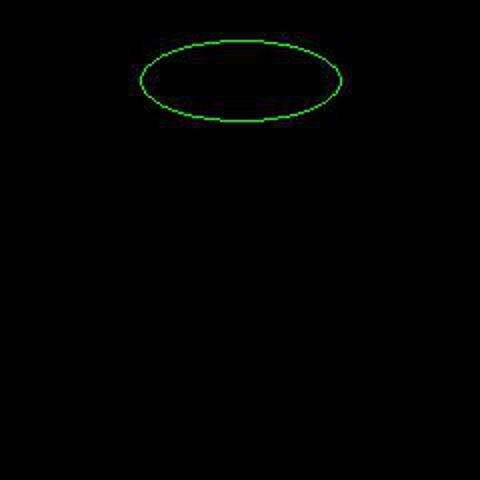

[ rpyc-kernel ]( running at Fri Jan 14 16:49:49 2022 )


In [1]:
from maix import image, display

img = image.Image().new(size = (240, 240), color = (0, 0, 0), 
                        mode = "RGB")     #创建一张黑色背景图

img.draw_ellipse(120, 40, 20, 50, 90, 0, 360, color=(0,255,0), 
                        thickness = 1)

display.show(img)

画椭圆的参数比较复杂，详情请查看 miaxpy3 API 。

### 图像的打开与保存

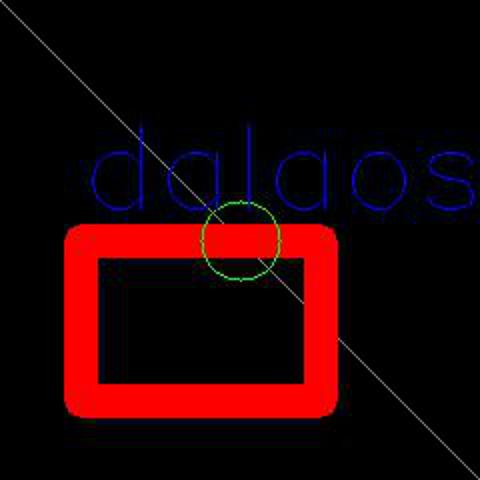

In [1]:
from maix import image, display

img = image.Image()

img.new(size=(240, 240), mode="RGB")
img.draw_line(0, 0, 240, 240)
img.draw_rectangle(40, 120, 160, 200, color=(255, 0, 0), thickness=16)
img.draw_circle(120, 120, 20, color=(0, 255, 0))
img.draw_string(40, 40, "dalaoshu", 2, color=(0, 0, 255))

img.save("/root/test.png")

tmp = image.Image()
tmp.open("/root/test.png")

display.show(tmp)



## vision 算法

maixpy3 中集成了一些常用的 vision 算法，下面是 vision 算法的简单使用例子。



### 寻找色块

使用 maixpy3 的查找色块算法，查找图像中符合颜色阈值的色块。

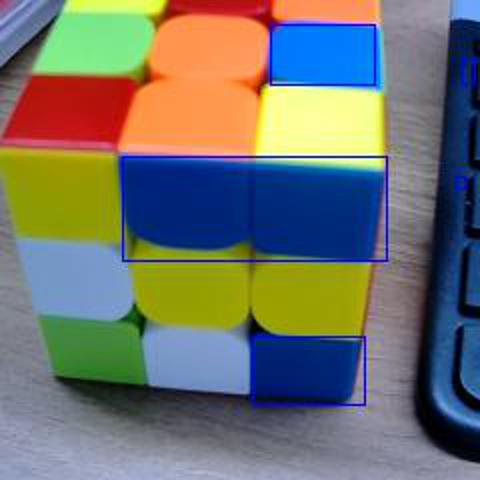


Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt


In [1]:
from maix import image, display, camera    #导入需要的包

bull = [(13, 11, -91, 54, 48, -28)]  # 蓝色的lab阈值

while True:
    img = camera.capture()       #获取一张图片
    
    blobs = img.find_blobs(bull)    #在图片中查找lab阈值内的颜色色块
    
    if blobs:             #判断是否找到颜色
        for i in blobs:   #遍历颜色
            img.draw_rectangle(i["x"], i["y"], i["x"] + i["w"], i["y"] + i["h"], 
                               color=(0, 0, 255), thickness=1) #将找到的颜色区域画出来
            
    display.show(img)


### 视觉找线

找线算法是面对小车寻线而开发的一个算法。主要的流程是，灰度化 -> 自适应阈值处理 -> 形态学运算 -> 图像最小二乘法。完成算法流程后返回一条线的信息，让小车能够根据识别出来线的信息进行运动。这个接口比较适合做图像寻线。


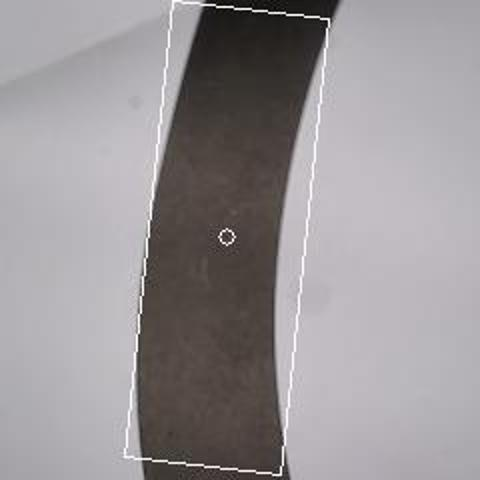


Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt


In [1]:
from maix import image, display, camera
import time

while True:
  img = camera.capture()
  line = img.find_line()
  img.draw_line(line["rect"][0], line["rect"][1], line["rect"][2],
                line["rect"][3], color=(255, 255, 255), thickness=1)
  img.draw_line(line["rect"][2], line["rect"][3], line["rect"][4],
                line["rect"][5], color=(255, 255, 255), thickness=1)
  img.draw_line(line["rect"][4], line["rect"][5], line["rect"][6],
                line["rect"][7], color=(255, 255, 255), thickness=1)
  img.draw_line(line["rect"][6], line["rect"][7], line["rect"][0],
                line["rect"][1], color=(255, 255, 255), thickness=1)
  img.draw_circle(line["cx"], line["cy"], 4,
                  color=(255, 255, 255), thickness=1)
  display.show(img)



### 获取区域的颜色

颜色统计算法，统计感兴趣区域最多的颜色并返回。


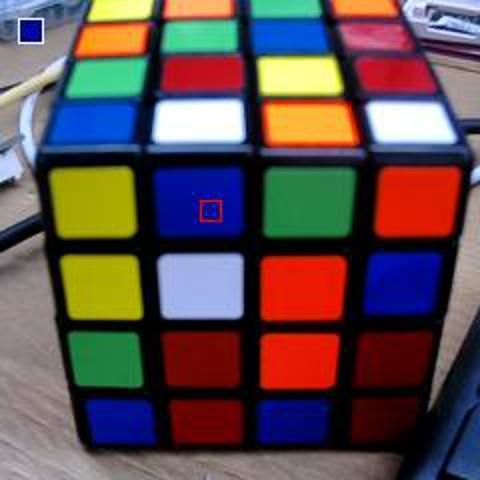


Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt


In [1]:
from maix import image, display, camera
import time

while True:
  img = camera.capture()
  colors = img.get_blob_color((100, 100, 10, 10), 0, 0)
  img.draw_rectangle(100, 100, 110, 110, 
                               color=(255, 0, 0), thickness=1) #将找到的颜色区域画出来
  img.draw_rectangle(9, 9, 21, 21, 
                               color=(255, 255, 255), thickness=1) #将找到的颜色区域画出来
  img.draw_rectangle(10, 10, 20, 20, 
                               color=(int(colors[0]), int(colors[1]), int(colors[2])), thickness=-1) #将找到的颜色区域画出来
  display.show(img)

   
### 识别二维码 

采用 zbar 实现，查找画面中出现的二维码。

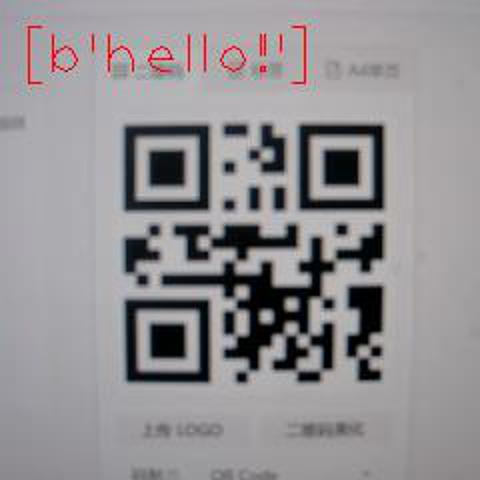


Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt


In [1]:
from maix import camera, display, zbar
while True:
    img = camera.capture()
    result = zbar.scan_codes(["qrcode", "code39"], img)
    display.show(tmp.draw_string(10, 10, str(result), 2.0, (255, 0, 0)))



## 更多传统视觉方法小编正在努力开发中，敬请期待！！！